# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
print("size: ",len(df['temperature']))

size:  130


## 1.  Is the distribution of body temperatures normal? ##

**Graphical Ways to test normality**

The mean and median of a normal distribution are equal. The density plot of the distribution is symmetric around the mean/median. The quantile-quantile plot of a normal distribution fits on a straight line.

In [4]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

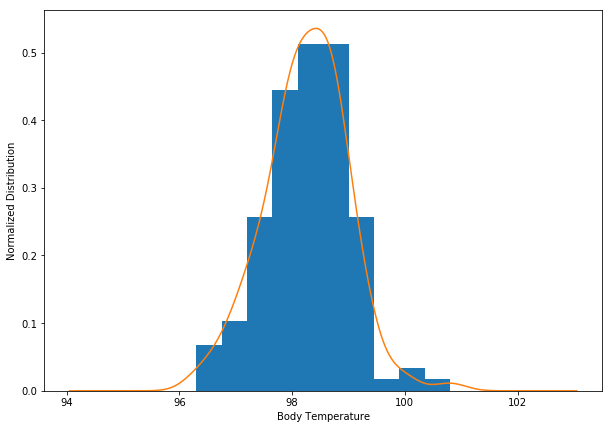

In [5]:
# the density plot and the histogram of the distribution of the body temperature
plt.figure(figsize=(10, 7))
df.temperature.hist(normed=True)
df.temperature.plot(kind = 'kde')
plt.xlabel('Body Temperature')
plt.ylabel('Normalized Distribution')
plt.show()

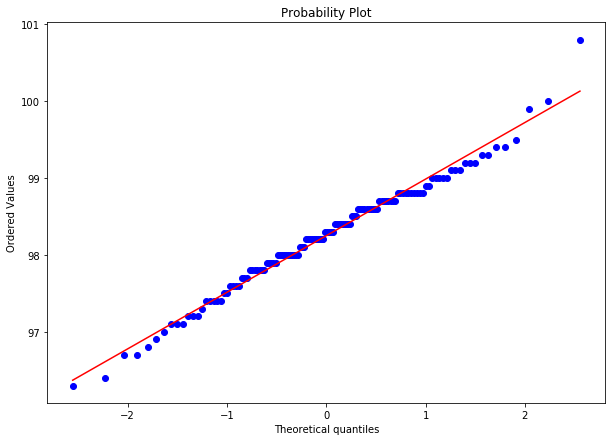

In [6]:
# Qunatile-quantile plot of distribution of the body temperatures
plt.figure(figsize=(10, 7))
stats.probplot(df['temperature'],plot=plt)
plt.show()

In [7]:
print('Mean of the distribution is: ',np.mean(df['temperature']),' and the Median is ',np.median(df['temperature']))

Mean of the distribution is:  98.2492307692  and the Median is  98.3


### Observation: ###

1. The density plot of the distribution of temperature is about symmetrical around 98.3
2. The quantile-quantile plot of the distribution almost linear
3. The mean and the median of the distributions are equal


## Statistical Tests of Normality ##

***I. Shapiro Wilk Test***

The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data distribution is normal. This method was created by Samuel Shapiro and Martin Wilk.

In [8]:
stat, p = stats.shapiro(df['temperature'])
if(p > 0.05):
    print('Distribution of the body temperature is Normal')
else:
    print('Distribution of the body temperature is not Normal')        

Distribution of the body temperature is Normal


***II. D’Agostino’s K-squared Test***

The D’Agostino’s K-squared test calculates the kurtosis and skewness to determine if the data distribution departs from the normal distribution. This test was developed by Ralph D’Agostino.

In [9]:
skew, kurt = stats.normaltest(df['temperature'])
if(kurt > 0.005):
    print('Distribution of the body temperature is Normal')
else:
    print('Distribution of the body temperature is not Normal') 

Distribution of the body temperature is Normal


## 2. Is the sample size large? Are the observations independent? ##


**2.1 Sample Size Consideration**

In the classical central limit theorem one of the assumptions is that the sample size n has to be infintely large. In reality this a considerably large sample size is used to meet this requirement. For the practical purpose, we assume the sample size has to be greater than 30 to be considered large enough for the Central limit theorem.


In [10]:
# Check if the sample size, n is greater than 30
if len(df) > 30:
    print('Sample size is:', len(df),'(i.e. n>30); it is large enough for Central Limit Theorem')
else: 
    print('Sample size is not large enough for Central Limit Theorem')

Sample size is: 130 (i.e. n>30); it is large enough for Central Limit Theorem


**2.2 Are The observations independant?**

The body temperature of an individual does not affect the others' body temperature. Thus, the observation of each person's body temperature is independent of others.

## 3. Is the true population mean really 98.6 degrees F?

**i. Bootstrap Hypothesis Test**

In [23]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


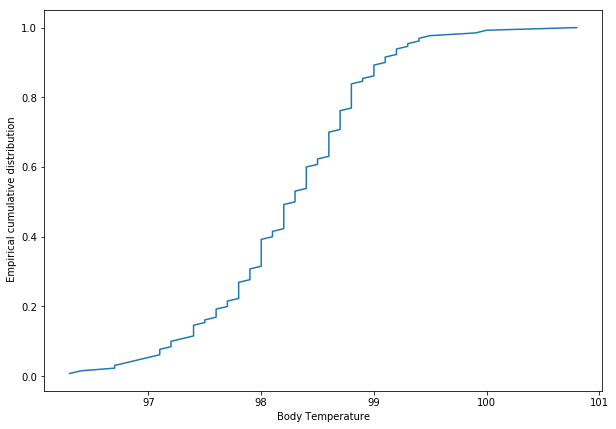

In [29]:
# empirical distribution function of the temperature observations
x, y = ecdf(df.temperature)
plt.figure(figsize=(10, 7))
plt.plot(x, y)
plt.xlabel('Body Temperature')
plt.ylabel(' Empirical cumulative distribution')
plt.show()

Since there is no distribution to achieve the mean body temperature of 998.6 is unknown, we will shift the distribution of observed body temperature to match the mean of 98.6. Hence, overall shape of the shifted distribution will remain same as the original distribution.

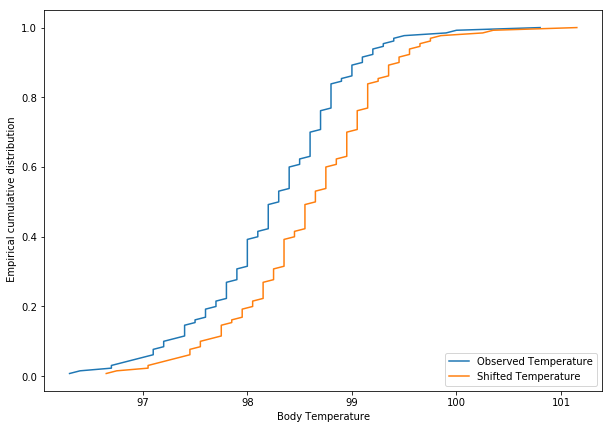

In [33]:
# shift the distribution of temperature to match the mean 98.6
shifted_temperature = df.temperature - np.mean(df.temperature) + 98.6

# CDF of the shifted distribution
x_shifted, y_shifted = ecdf(shifted_temperature)

# plot of the two distribution to compare the shape of overall distribution
plt.figure(figsize=(10, 7))
plt.plot(x, y)
plt.plot(x_shifted, y_shifted)
plt.xlabel('Body Temperature')
plt.ylabel(' Empirical cumulative distribution')
plt.legend(('Observed Temperature', 'Shifted Temperature'), loc='lower right')
plt.show()

In [11]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    return bs_replicates


In [40]:
# mean of the original distribution
df_temperature_mean = np.mean(df.temperature)

# bostrapped means of randomly drawn samples
bs_temperature_mean = draw_bs_reps(shifted_temperature, np.mean, 10000)

# test statistics p
p = np.sum(bs_temperature_mean>=df_temperature_mean)/len(bs_temperature_mean)

# print the 95% confidence level
print("95% confidence interval:", np.percentile(bs_temperature_mean, (2.5,97.5)))
print("Test statistics p:", p)

95% confidence interval: [ 98.47384615  98.72692308]
Test statistics p: 1.0


In [34]:
np.mean(df.temperature)

98.249230769230749

In [ ]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps